In [1]:
import sys
import time
import os.path
from glob import glob
from datetime import datetime, timedelta

# data tools
import h5py
import numpy as np

# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/utils/')

import data_utils as du
import graph_utils as gu

from namelist import *

In [2]:
# graph tools
import cmaps
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [3]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = fig_keys['dpi']
else:
    dpi_ = 75

In [4]:
# def bs_3c(pred, frac, o, hist):
#     '''
#     bs three components decompose
#     '''
#     L = len(pred)
#     f = np.empty((L,))
#     r = np.empty((L,))
#     for i in range(L):
#         f[i] = np.nansum(((pred[i, :] - frac[i, :])**2)*hist[i, :])/np.sum(hist[i, :])
#         r[i] = np.nansum(((frac[i, :] - o[i])**2)*hist[i, :])/np.sum(hist[i, :])
#     return f, r

# with h5py.File(save_dir+'GEFS_Calib_loc0.hdf', 'r') as h5io:
#     GEFS_frac_loc0 = h5io['pos_frac'][...]
#     GEFS_pred_loc0 = h5io['pred_value'][...]
#     GEFS_brier_loc0 = h5io['brier'][...]
#     GEFS_obar_loc0 = h5io['o_bar'][...]
#     GEFS_use_loc0 = h5io['use'][...]

# with h5py.File(save_dir+'GEFS_Calib_loc1.hdf', 'r') as h5io:
#     GEFS_frac_loc1 = h5io['pos_frac'][...]
#     GEFS_pred_loc1 = h5io['pred_value'][...]
#     GEFS_brier_loc1 = h5io['brier'][...]
#     GEFS_obar_loc1 = h5io['o_bar'][...]
#     GEFS_use_loc1 = h5io['use'][...]

# with h5py.File(save_dir+'GEFS_Calib_loc2.hdf', 'r') as h5io:
#     GEFS_frac_loc2 = h5io['pos_frac'][...]
#     GEFS_pred_loc2 = h5io['pred_value'][...]
#     GEFS_brier_loc2 = h5io['brier'][...]
#     GEFS_obar_loc2 = h5io['o_bar'][...]
#     GEFS_use_loc2 = h5io['use'][...]
    
# with h5py.File(save_dir+'BASE_final_Calib_loc0.hdf', 'r') as h5io:
#     BASE_frac_loc0 = h5io['pos_frac'][...]
#     BASE_pred_loc0 = h5io['pred_value'][...]
#     BASE_brier_loc0 = h5io['brier'][...]
#     BASE_use_loc0 = h5io['use'][...]

# with h5py.File(save_dir+'BASE_final_Calib_loc1.hdf', 'r') as h5io:
#     BASE_frac_loc1 = h5io['pos_frac'][...]
#     BASE_pred_loc1 = h5io['pred_value'][...]
#     BASE_brier_loc1 = h5io['brier'][...]
#     BASE_use_loc1 = h5io['use'][...]

# with h5py.File(save_dir+'BASE_final_Calib_loc2.hdf', 'r') as h5io:
#     BASE_frac_loc2 = h5io['pos_frac'][...]
#     BASE_pred_loc2 = h5io['pred_value'][...]
#     BASE_brier_loc2 = h5io['brier'][...]
#     BASE_use_loc2 = h5io['use'][...]
    
# with h5py.File(save_dir+'SL_final_Calib_loc0.hdf', 'r') as h5io:
#     SL_frac_loc0 = h5io['pos_frac'][...]
#     SL_pred_loc0 = h5io['pred_value'][...]
#     SL_brier_loc0 = h5io['brier'][...]
#     SL_use_loc0 = h5io['use'][...]

# with h5py.File(save_dir+'SL_final_Calib_loc1.hdf', 'r') as h5io:
#     SL_frac_loc1 = h5io['pos_frac'][...]
#     SL_pred_loc1 = h5io['pred_value'][...]
#     SL_brier_loc1 = h5io['brier'][...]
#     SL_use_loc1 = h5io['use'][...]

# with h5py.File(save_dir+'SL_final_Calib_loc2.hdf', 'r') as h5io:
#     SL_frac_loc2 = h5io['pos_frac'][...]
#     SL_pred_loc2 = h5io['pred_value'][...]
#     SL_brier_loc2 = h5io['brier'][...]
#     SL_use_loc2 = h5io['use'][...]
    
# with h5py.File(save_dir+'BASE_CNN_Calib_loc0.hdf', 'r') as h5io:
#     BCNN_frac_loc0 = h5io['pos_frac'][...]
#     BCNN_pred_loc0 = h5io['pred_value'][...]
#     BCNN_brier_loc0 = h5io['brier'][...]
#     BCNN_use_loc0 = h5io['use'][...]

# with h5py.File(save_dir+'BASE_CNN_Calib_loc1.hdf', 'r') as h5io:
#     BCNN_frac_loc1 = h5io['pos_frac'][...]
#     BCNN_pred_loc1 = h5io['pred_value'][...]
#     BCNN_brier_loc1 = h5io['brier'][...]
#     BCNN_use_loc1 = h5io['use'][...]

# with h5py.File(save_dir+'BASE_CNN_Calib_loc2.hdf', 'r') as h5io:
#     BCNN_frac_loc2 = h5io['pos_frac'][...]
#     BCNN_pred_loc2 = h5io['pred_value'][...]
#     BCNN_brier_loc2 = h5io['brier'][...]
#     BCNN_use_loc2 = h5io['use'][...]
    
# with h5py.File(save_dir+'SL_CNN_Calib_loc0.hdf', 'r') as h5io:
#     SCNN_frac_loc0 = h5io['pos_frac'][...]
#     SCNN_pred_loc0 = h5io['pred_value'][...]
#     SCNN_brier_loc0 = h5io['brier'][...]
#     SCNN_use_loc0 = h5io['use'][...]

# with h5py.File(save_dir+'SL_CNN_Calib_loc1.hdf', 'r') as h5io:
#     SCNN_frac_loc1 = h5io['pos_frac'][...]
#     SCNN_pred_loc1 = h5io['pred_value'][...]
#     SCNN_brier_loc1 = h5io['brier'][...]
#     SCNN_use_loc1 = h5io['use'][...]

# with h5py.File(save_dir+'SL_CNN_Calib_loc2.hdf', 'r') as h5io:
#     SCNN_frac_loc2 = h5io['pos_frac'][...]
#     SCNN_pred_loc2 = h5io['pred_value'][...]
#     SCNN_brier_loc2 = h5io['brier'][...]
#     SCNN_use_loc2 = h5io['use'][...]

In [5]:
# PLOT_loc0 = {}
# PLOT_loc0['gefs_fm'] = np.mean(GEFS_frac_loc0, axis=2)
# PLOT_loc0['gefs_pm'] = np.mean(GEFS_pred_loc0, axis=2)
# PLOT_loc0['gefs_fs'] = np.quantile(np.abs(GEFS_frac_loc0-PLOT_loc0['gefs_fm'][..., None]), 0.95, axis=2)

# PLOT_loc0['base_fm'] = np.mean(BASE_frac_loc0, axis=2)
# PLOT_loc0['base_pm'] = np.mean(BASE_pred_loc0, axis=2)
# PLOT_loc0['base_fs'] = np.quantile(np.abs(BASE_frac_loc0-PLOT_loc0['base_fm'][..., None]), 0.95, axis=2)

# PLOT_loc0['bcnn_fm'] = np.mean(BCNN_frac_loc0, axis=2)
# PLOT_loc0['bcnn_pm'] = np.mean(BCNN_pred_loc0, axis=2)
# PLOT_loc0['bcnn_fs'] = np.quantile(np.abs(BCNN_frac_loc0-PLOT_loc0['bcnn_fm'][..., None]), 0.95, axis=2)

# PLOT_loc0['sl_fm'] = np.mean(SL_frac_loc0, axis=2)
# PLOT_loc0['sl_pm'] = np.mean(SL_pred_loc0, axis=2)
# PLOT_loc0['sl_fs'] = np.quantile(np.abs(SL_frac_loc0-PLOT_loc0['sl_fm'][..., None]), 0.95, axis=2)

# PLOT_loc0['scnn_fm'] = np.mean(SCNN_frac_loc0, axis=2)
# PLOT_loc0['scnn_pm'] = np.mean(SCNN_pred_loc0, axis=2)
# PLOT_loc0['scnn_fs'] = np.quantile(np.abs(SCNN_frac_loc0-PLOT_loc0['scnn_fm'][..., None]), 0.95, axis=2)

# PLOT_loc1 = {}
# PLOT_loc1['gefs_fm'] = np.mean(GEFS_frac_loc1, axis=2)
# PLOT_loc1['gefs_pm'] = np.mean(GEFS_pred_loc1, axis=2)
# PLOT_loc1['gefs_fs'] = np.quantile(np.abs(GEFS_frac_loc1-PLOT_loc1['gefs_fm'][..., None]), 0.95, axis=2)

# PLOT_loc1['base_fm'] = np.mean(BASE_frac_loc1, axis=2)
# PLOT_loc1['base_pm'] = np.mean(BASE_pred_loc1, axis=2)
# PLOT_loc1['base_fs'] = np.quantile(np.abs(BASE_frac_loc1-PLOT_loc1['base_fm'][..., None]), 0.95, axis=2)

# PLOT_loc1['bcnn_fm'] = np.mean(BCNN_frac_loc1, axis=2)
# PLOT_loc1['bcnn_pm'] = np.mean(BCNN_pred_loc1, axis=2)
# PLOT_loc1['bcnn_fs'] = np.quantile(np.abs(BCNN_frac_loc1-PLOT_loc1['bcnn_fm'][..., None]), 0.95, axis=2)

# PLOT_loc1['sl_fm'] = np.mean(SL_frac_loc1, axis=2)
# PLOT_loc1['sl_pm'] = np.mean(SL_pred_loc1, axis=2)
# PLOT_loc1['sl_fs'] = np.quantile(np.abs(SL_frac_loc1-PLOT_loc1['sl_fm'][..., None]), 0.95, axis=2)

# PLOT_loc1['scnn_fm'] = np.mean(SCNN_frac_loc1, axis=2)
# PLOT_loc1['scnn_pm'] = np.mean(SCNN_pred_loc1, axis=2)
# PLOT_loc1['scnn_fs'] = np.quantile(np.abs(SCNN_frac_loc1-PLOT_loc1['scnn_fm'][..., None]), 0.95, axis=2)

# PLOT_loc2 = {}
# PLOT_loc2['gefs_fm'] = np.mean(GEFS_frac_loc2, axis=2)
# PLOT_loc2['gefs_pm'] = np.mean(GEFS_pred_loc2, axis=2)
# PLOT_loc2['gefs_fs'] = np.quantile(np.abs(GEFS_frac_loc2-PLOT_loc2['gefs_fm'][..., None]), 0.95, axis=2)

# PLOT_loc2['base_fm'] = np.mean(BASE_frac_loc2, axis=2)
# PLOT_loc2['base_pm'] = np.mean(BASE_pred_loc2, axis=2)
# PLOT_loc2['base_fs'] = np.quantile(np.abs(BASE_frac_loc2-PLOT_loc2['base_fm'][..., None]), 0.95, axis=2)

# PLOT_loc2['bcnn_fm'] = np.mean(BCNN_frac_loc2, axis=2)
# PLOT_loc2['bcnn_pm'] = np.mean(BCNN_pred_loc2, axis=2)
# PLOT_loc2['bcnn_fs'] = np.quantile(np.abs(BCNN_frac_loc2-PLOT_loc2['bcnn_fm'][..., None]), 0.95, axis=2)

# PLOT_loc2['sl_fm'] = np.mean(SL_frac_loc2, axis=2)
# PLOT_loc2['sl_pm'] = np.mean(SL_pred_loc2, axis=2)
# PLOT_loc2['sl_fs'] = np.quantile(np.abs(SL_frac_loc2-PLOT_loc2['sl_fm'][..., None]), 0.95, axis=2)

# PLOT_loc2['scnn_fm'] = np.mean(SCNN_frac_loc2, axis=2)
# PLOT_loc2['scnn_pm'] = np.mean(SCNN_pred_loc2, axis=2)
# PLOT_loc2['scnn_fs'] = np.quantile(np.abs(SCNN_frac_loc2-PLOT_loc2['scnn_fm'][..., None]), 0.95, axis=2)

In [6]:
# BS_loc0 = {}
# BS_loc0['gefs'] = np.mean(GEFS_brier_loc0, axis=1)
# BS_loc0['base'] = np.mean(BASE_brier_loc0, axis=1)
# BS_loc0['bcnn'] = np.mean(BCNN_brier_loc0, axis=1)
# BS_loc0['sl'] = np.mean(SL_brier_loc0, axis=1)
# BS_loc0['scnn'] = np.mean(SCNN_brier_loc0, axis=1)

# BS_loc1 = {}
# BS_loc1['gefs'] = np.mean(GEFS_brier_loc1, axis=1)
# BS_loc1['base'] = np.mean(BASE_brier_loc1, axis=1)
# BS_loc1['bcnn'] = np.mean(BCNN_brier_loc1, axis=1)
# BS_loc1['sl'] = np.mean(SL_brier_loc1, axis=1)
# BS_loc1['scnn'] = np.mean(SCNN_brier_loc1, axis=1)

# BS_loc2 = {}
# BS_loc2['gefs'] = np.mean(GEFS_brier_loc2, axis=1)
# BS_loc2['base'] = np.mean(BASE_brier_loc2, axis=1)
# BS_loc2['bcnn'] = np.mean(BCNN_brier_loc2, axis=1)
# BS_loc2['sl'] = np.mean(SL_brier_loc2, axis=1)
# BS_loc2['scnn'] = np.mean(SCNN_brier_loc2, axis=1)

# USE_loc0 = {}
# USE_loc0['gefs'] = GEFS_use_loc0/np.sum(GEFS_use_loc0)
# USE_loc0['base'] = BASE_use_loc0/np.sum(GEFS_use_loc0)
# USE_loc0['bcnn'] = BCNN_use_loc0/np.sum(GEFS_use_loc0)
# USE_loc0['sl'] = SL_use_loc0/np.sum(GEFS_use_loc0)
# USE_loc0['scnn'] = SCNN_use_loc0/np.sum(GEFS_use_loc0)

# USE_loc1 = {}
# USE_loc1['gefs'] = GEFS_use_loc1/np.sum(GEFS_use_loc1)
# USE_loc1['base'] = BASE_use_loc1/np.sum(GEFS_use_loc1)
# USE_loc1['bcnn'] = BCNN_use_loc1/np.sum(GEFS_use_loc1)
# USE_loc1['sl'] = SL_use_loc1/np.sum(GEFS_use_loc1)
# USE_loc1['scnn'] = SCNN_use_loc1/np.sum(GEFS_use_loc1)

# USE_loc2 = {}
# USE_loc2['gefs'] = GEFS_use_loc2/np.sum(GEFS_use_loc2)
# USE_loc2['base'] = BASE_use_loc2/np.sum(GEFS_use_loc2)
# USE_loc2['bcnn'] = BCNN_use_loc2/np.sum(GEFS_use_loc2)
# USE_loc2['sl'] = SL_use_loc2/np.sum(GEFS_use_loc2)
# USE_loc2['scnn'] = SCNN_use_loc2/np.sum(GEFS_use_loc2)

# o_bar = {}
# o_bar_loc0 = o_bar['loc0'] = GEFS_obar_loc0
# o_bar_loc1 = o_bar['loc1'] = GEFS_obar_loc1
# o_bar_loc2 = o_bar['loc2'] = GEFS_obar_loc2

# REL_loc0 = {}
# RES_loc0 = {}
# BS_3c_loc0 = {}

# rel_, res_ = bs_3c(PLOT_loc0['gefs_pm'], PLOT_loc0['gefs_fm'], o_bar['loc0'], USE_loc0['gefs'])
# REL_loc0['gefs'] = rel_
# RES_loc0['gefs'] = res_
# BS_3c_loc0['gefs'] = o_bar_loc0*(1-o_bar_loc0) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc0['base_pm'], PLOT_loc0['base_fm'], o_bar['loc0'], USE_loc0['base'])
# REL_loc0['base'] = rel_
# RES_loc0['base'] = res_
# BS_3c_loc0['base'] = o_bar_loc0*(1-o_bar_loc0) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc0['bcnn_pm'], PLOT_loc0['bcnn_fm'], o_bar['loc0'], USE_loc0['bcnn'])
# REL_loc0['bcnn'] = rel_
# RES_loc0['bcnn'] = res_
# BS_3c_loc0['bcnn'] = o_bar_loc0*(1-o_bar_loc0) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc0['sl_pm'], PLOT_loc0['sl_fm'], o_bar['loc0'], USE_loc0['sl'])
# REL_loc0['sl'] = rel_
# RES_loc0['sl'] = res_
# BS_3c_loc0['sl'] = o_bar_loc0*(1-o_bar_loc0) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc0['scnn_pm'], PLOT_loc0['scnn_fm'], o_bar['loc0'], USE_loc0['scnn'])
# REL_loc0['scnn'] = rel_
# RES_loc0['scnn'] = res_
# BS_3c_loc0['scnn'] = o_bar_loc0*(1-o_bar_loc0) + rel_ - res_

# REL_loc1 = {}
# RES_loc1 = {}
# BS_3c_loc1 = {}

# rel_, res_ = bs_3c(PLOT_loc1['gefs_pm'], PLOT_loc1['gefs_fm'], o_bar['loc1'], USE_loc1['gefs'])
# REL_loc1['gefs'] = rel_
# RES_loc1['gefs'] = res_
# BS_3c_loc1['gefs'] = o_bar_loc1*(1-o_bar_loc1) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc1['base_pm'], PLOT_loc1['base_fm'], o_bar['loc1'], USE_loc1['base'])
# REL_loc1['base'] = rel_
# RES_loc1['base'] = res_
# BS_3c_loc1['base'] = o_bar_loc1*(1-o_bar_loc1) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc1['bcnn_pm'], PLOT_loc1['bcnn_fm'], o_bar['loc1'], USE_loc1['bcnn'])
# REL_loc1['bcnn'] = rel_
# RES_loc1['bcnn'] = res_
# BS_3c_loc1['bcnn'] = o_bar_loc1*(1-o_bar_loc1) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc1['sl_pm'], PLOT_loc1['sl_fm'], o_bar['loc1'], USE_loc1['sl'])
# REL_loc1['sl'] = rel_
# RES_loc1['sl'] = res_
# BS_3c_loc1['sl'] = o_bar_loc1*(1-o_bar_loc1) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc1['scnn_pm'], PLOT_loc1['scnn_fm'], o_bar['loc1'], USE_loc1['scnn'])
# REL_loc1['scnn'] = rel_
# RES_loc1['scnn'] = res_
# BS_3c_loc1['scnn'] = o_bar_loc1*(1-o_bar_loc1) + rel_ - res_

# REL_loc2 = {}
# RES_loc2 = {}
# BS_3c_loc2 = {}

# rel_, res_ = bs_3c(PLOT_loc2['gefs_pm'], PLOT_loc2['gefs_fm'], o_bar['loc2'], USE_loc2['gefs'])
# REL_loc2['gefs'] = rel_
# RES_loc2['gefs'] = res_
# BS_3c_loc2['gefs'] = o_bar_loc2*(1-o_bar_loc2) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc2['base_pm'], PLOT_loc2['base_fm'], o_bar['loc2'], USE_loc2['base'])
# REL_loc2['base'] = rel_
# RES_loc2['base'] = res_
# BS_3c_loc2['base'] = o_bar_loc2*(1-o_bar_loc2) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc2['bcnn_pm'], PLOT_loc2['bcnn_fm'], o_bar['loc2'], USE_loc2['bcnn'])
# REL_loc2['bcnn'] = rel_
# RES_loc2['bcnn'] = res_
# BS_3c_loc2['bcnn'] = o_bar_loc2*(1-o_bar_loc2) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc2['sl_pm'], PLOT_loc2['sl_fm'], o_bar['loc2'], USE_loc2['sl'])
# REL_loc2['sl'] = rel_
# RES_loc2['sl'] = res_
# BS_3c_loc2['sl'] = o_bar_loc2*(1-o_bar_loc2) + rel_ - res_

# rel_, res_ = bs_3c(PLOT_loc2['scnn_pm'], PLOT_loc2['scnn_fm'], o_bar['loc2'], USE_loc2['scnn'])
# REL_loc2['scnn'] = rel_
# RES_loc2['scnn'] = res_
# BS_3c_loc2['scnn'] = o_bar_loc2*(1-o_bar_loc2) + rel_ - res_


In [7]:
# save_dict = {'PLOT':PLOT_loc0, 'BS':BS_loc0, 'USE':USE_loc0, 
#              'o_bar':o_bar['loc0'], 'REL':REL_loc0, 'RES':RES_loc0, 'BS_3c':BS_3c_loc0}
# np.save(save_dir+'Calib_BCH_loc0.npy', save_dict)

# save_dict = {'PLOT':PLOT_loc1, 'BS':BS_loc1, 'USE':USE_loc1, 
#              'o_bar':o_bar['loc1'], 'REL':REL_loc1, 'RES':RES_loc1, 'BS_3c':BS_3c_loc1}
# np.save(save_dir+'Calib_BCH_loc1.npy', save_dict)

# save_dict = {'PLOT':PLOT_loc2, 'BS':BS_loc2, 'USE':USE_loc2, 
#              'o_bar':o_bar['loc2'], 'REL':REL_loc2, 'RES':RES_loc2, 'BS_3c':BS_3c_loc2}
# np.save(save_dir+'Calib_BCH_loc2.npy', save_dict)

# Figures

In [8]:
gray = '0.5'
C = [red, orange, blue, cyan, gray]
LS = ['--', '-', '--', '-', '-']
M = ['v', 'o', '<', 's', '>', 'd', 'o']

KW = {}
KW['gefs'] = {'linestyle': '-', 'color': gray, 'linewidth':3.5, 'elinewidth':1.5}
KW['base'] = {'linestyle': '-', 'color': orange, 'linewidth':3.5, 'elinewidth':1.5}
KW['bcnn'] = {'linestyle': '--', 'color': red, 'linewidth':3.5, 'elinewidth':1.5}
KW['sl'] = {'linestyle': '-', 'color': cyan, 'linewidth':3.5, 'elinewidth':1.5}
KW['scnn'] = {'linestyle': '--', 'color': blue, 'linewidth':3.5, 'elinewidth':1.5}

kw_lines = {}
kw_lines['gfs'] = {'linestyle': '-', 'color': gray, 'linewidth':2.5}
kw_lines['era'] = {'linestyle': '--', 'color': 'k', 'linewidth':2.5}
kw_lines['base'] = {'linestyle': '-', 'color': orange, 'linewidth':2.5}
kw_lines['bcnn'] = {'linestyle': '--', 'color': red, 'linewidth':2.5}
kw_lines['sl'] = {'linestyle': '-', 'color': cyan, 'linewidth':2.5}
kw_lines['scnn'] = {'linestyle': '--', 'color': blue, 'linewidth':2.5}

In [9]:
def filter_single_point(use, plot):
    methods = ['bcnn', 'base', 'scnn', 'sl', 'gefs']
    for i, m in enumerate(methods):
        for j in range(7):
            flag_single_point = use[m][j, :] < 1e-5
            if np.sum(flag_single_point) > 0:
                use[m][j, flag_single_point] = np.nan
                plot['{}_fm'.format(m)][j, flag_single_point] = np.nan
    return use, plot

## South Coast

In [10]:
calib_dict = np.load(save_dir+'Calib_BCH_loc0.npy', allow_pickle=True)[()]
PLOT = calib_dict['PLOT']
BS = calib_dict['BS_3c']
USE = calib_dict['USE']
o_bar = calib_dict['o_bar']
REL = calib_dict['REL']
RES = calib_dict['RES']

USE, PLOT = filter_single_point(USE, PLOT)
print('obar: {}, {}, {}'.format(o_bar[1], o_bar[3], o_bar[5]))

obar: 0.07851322075073197, 0.07891146595838225, 0.07894188144213074


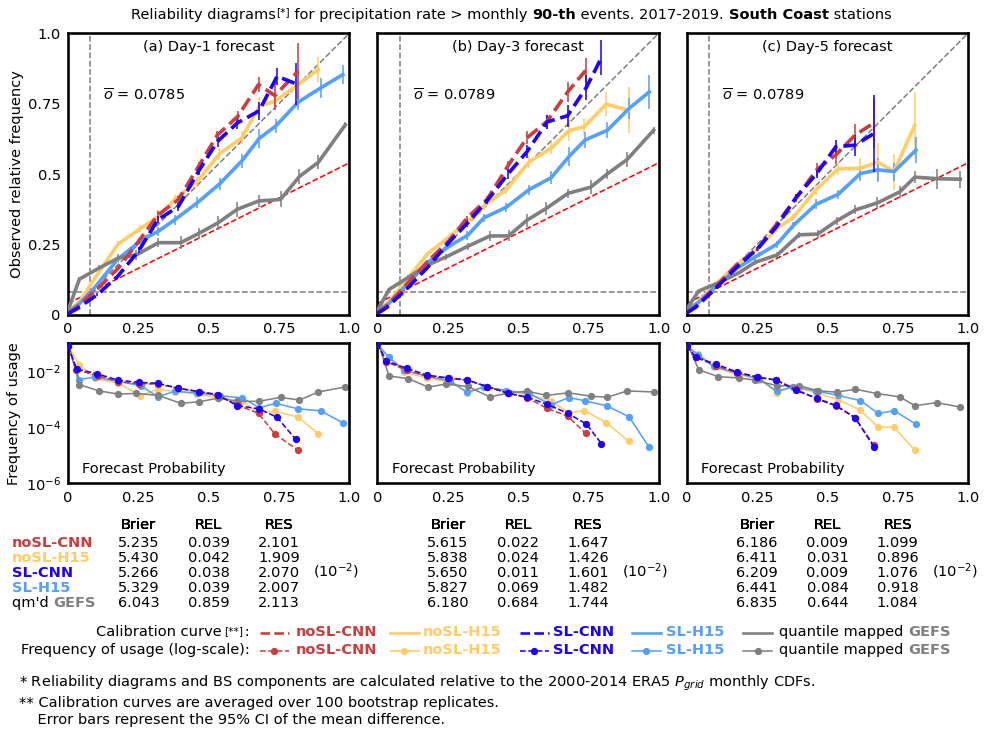

In [11]:
fig = plt.figure(figsize=(12, 12/(3.2)*2.05), dpi=dpi_)
titles = ['(a) Day-1 forecast', '(b) Day-3 forecast', '(c) Day-5 forecast']

handle_title = []
handle_lines = []
handle_marker = []

gs = gridspec.GridSpec(5, 5, height_ratios=[1, 0.1, 0.5, 0.15, 0.3], width_ratios=[1, 0.1, 1, 0.1, 1])

YLIM = [1e-6, 1e-1]
YLAB = [1e-6, 1e-4, 1e-2]

# no skill line
fake_x = np.linspace(0, 1, 100)
fake_y = [0.5*fake_x + 0.5*o_bar[1], 0.5*fake_x + 0.5*o_bar[3], 0.5*fake_x + 0.5*o_bar[5]]

AX_re = [] # reliability curve axis
AX_hi = [] # freq of use axis
AX_da = [] # data axis

for j in [0, 2, 4]:
    AX_re.append(plt.subplot(gs[0, j]))
    AX_hi.append(plt.subplot(gs[2, j]))
    AX_da.append(plt.subplot(gs[4, j]))

plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

for i, ax in enumerate(AX_re):
    ax = gu.ax_decorate_box(ax)
    ax.plot(fake_x, fake_x, linewidth=1.5, linestyle='--', color='0.5')
    ax.plot(fake_x, fake_y[i], linewidth=1.5, linestyle='--', color='r')

    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_aspect('equal')

for i, ax in enumerate(AX_da):
    ax.set_axis_off()

for i, ax in enumerate(AX_hi):
    ax = gu.ax_decorate_box(ax)
    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_yscale('log')
    ax.set_ylim(YLIM)
    ax.set_yticks(YLAB)
    
    ax.text(0.05, 0.05, 'Forecast Probability', ha='left', va='bottom', fontsize=14, transform=ax.transAxes)
        
AX_re[0].set_ylabel('Observed relative frequency', fontsize=14)
AX_hi[0].set_ylabel('Frequency of usage', fontsize=14)
AX_re[0].tick_params(axis="both", which="both", labelleft=True)
AX_hi[0].tick_params(axis="both", which="both", labelleft=True)

methods = ['bcnn', 'base', 'scnn', 'sl', 'gefs']
Z = [5, 4, 5, 4, 4, 3]
labels = ['noSL-CNN', 'noSL-H15', 'SL-CNN', 'SL-H15', 'GEFS']
label_ = ['             ',
          '             ',
          '         ',
          '         ',
          '                                    ',]

for i, ind in enumerate([0, 2, 4]):
    
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    
    AX_re[i].axvline(x=o_bar[ind], ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
    AX_re[i].axhline(y=o_bar[ind], xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
    
    for m, method in enumerate(methods):
        
        temp_p = PLOT['{}_pm'.format(method)][ind, :]
        temp_f = PLOT['{}_fm'.format(method)][ind, :]
        temp_95th = PLOT['{}_fs'.format(method)][ind, :]
        
        temp_ux = temp_p
        temp_uy = USE['{}'.format(method)][ind, :]
        
        AX_re[i].errorbar(temp_p, temp_f, yerr=temp_95th, **KW[method], zorder=Z[m])
        
        handle_lines += AX_hi[i].plot(temp_ux, temp_uy, color=C[m], linestyle=LS[m], linewidth=1.5, 
                                      marker='o', ms=7, mew=0, mfc=C[m], zorder=Z[m]-2, label=label_[m])
        
AX_re[0].text(0.125, 0.75, '$\overline{o}$ = 0.0785', ha='left', va='bottom', fontsize=14)
AX_re[1].text(0.125, 0.75, '$\overline{o}$ = 0.0789', ha='left', va='bottom', fontsize=14)
AX_re[2].text(0.125, 0.75, '$\overline{o}$ = 0.0789', ha='left', va='bottom', fontsize=14)

ax_t1 = fig.add_axes([0.5*(3.2-2.75)/3.2, 1.0, (2.75/3.2), 0.045])
ax_t1.set_axis_off()
handle_title += gu.string_partial_format(fig, ax_t1, 0, 1.0, 'left', 'top', 
                                         ['Reliability diagrams    for precipitation rate > monthly ', '90-th', 
                                         ' events. 2017-2019. ', 'South Coast', ' stations'], 
                                         ['k',]*5, [14,]*5, ['normal', 'bold', 'normal', 'bold', 'normal'])

ax_t1.text(0.205, 1.0, '[*]', ha='right', va='top', fontsize=10, transform=ax_t1.transAxes);

for handle in handle_title:
    handle.set_bbox(dict(facecolor='w', pad=0, edgecolor='none', zorder=2))
    
loc_y = [0.708, 0.53, 0.352, 0.173, 0.,]

table_heads = ['Brier', 'REL', 'RES']
locx_heads = [0.25, 0.5, 0.75]

for i, ind in enumerate([0, 2, 4]):
    
    AX_da[i].text(1.035, 0.5-0.035, r'($10^{-2}$)', ha='right', va='center', fontsize=14, transform=AX_da[i].transAxes)
    
    for m, method in enumerate(methods):
        for j in range(3):
            AX_da[i].text(locx_heads[j], 0.93, table_heads[j], ha='center', va='bottom', 
                             fontsize=14, transform=AX_da[i].transAxes)

        AX_da[i].text(locx_heads[0], loc_y[m], '{:.3f}'.format(1e2*BS['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        AX_da[i].text(locx_heads[1], loc_y[m], '{:.3f}'.format(1e2*REL['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        AX_da[i].text(locx_heads[2], loc_y[m], '{:.3f}'.format(1e2*RES['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        
for m, method in enumerate(methods[:-1]):
    AX_da[0].text(-0.2, loc_y[m], labels[m], ha='left', va='bottom', color=C[m], 
                  fontsize=14, fontweight='bold', transform=AX_da[0].transAxes)

gu.string_partial_format(fig, AX_da[0], -0.2, loc_y[-1], 'left', 'bottom', ["qm'd ", 'GEFS'], 
                         ['k', gray, 'k'], [14,]*3,  ['normal', 'bold', 'normal']);
    

handle_errbar = []
handle_errbar.append(mlines.Line2D([], [], label=label_[0], **kw_lines['bcnn']))
handle_errbar.append(mlines.Line2D([], [], label=label_[1], **kw_lines['base']))
handle_errbar.append(mlines.Line2D([], [], label=label_[2], **kw_lines['scnn']))
handle_errbar.append(mlines.Line2D([], [], label=label_[3], **kw_lines['sl']))
handle_errbar.append(mlines.Line2D([], [], label=label_[4], **kw_lines['gfs']))
    
ax_box = fig.add_axes([-0.055, -0.085, 1.05, 0.0625])
ax_box.set_axis_off()

ax_lw1 = inset_axes(ax_box, height='50%', width='25%', borderpad=0, loc=2)
ax_lw2 = inset_axes(ax_box, height='50%', width='25%', borderpad=0, loc=3)
ax_lg1 = inset_axes(ax_box, height='50%', width='75%', borderpad=0, loc=1)
ax_lg2 = inset_axes(ax_box, height='50%', width='75%', borderpad=0, loc=4)

ax_lw1.text(1, 0.5, 'Calibration curve     : ', ha='right', va='center', fontsize=14, transform=ax_lw1.transAxes);
ax_lw2.text(1, 0.5, 'Frequency of usage (log-scale): ', ha='right', va='center', fontsize=14, transform=ax_lw2.transAxes);

ax_lw1.text(0.95, 0.55, '[**]', ha='right', va='center', fontsize=10, transform=ax_lw1.transAxes);

LG = ax_lg1.legend(handles=handle_errbar, 
                   bbox_to_anchor=(1, 1.5), ncol=5, prop={'size':14}, fancybox=False);
LG.get_frame().set_facecolor('none')
LG.get_frame().set_linewidth(0)
LG.get_frame().set_alpha(1.0)

LG1 = ax_lg2.legend(handles=handle_lines[0:5], 
                    bbox_to_anchor=(1, 1.5), ncol=5, prop={'size':14}, fancybox=False);
LG1.get_frame().set_facecolor('none')
LG1.get_frame().set_linewidth(0)
LG1.get_frame().set_alpha(1.0)

ax_lg1.text(0.0575, 0.9, 'noSL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.2375, 0.9, 'noSL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.42, 0.9, 'SL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.58, 0.9, 'SL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg1.transAxes)
gu.string_partial_format(fig, ax_lg1, 0.74, 0.9, 'left', 'top', ['quantile mapped ', 'GEFS'], 
                         ['k', gray, 'k'], [14,]*3,  ['normal', 'bold', 'normal']);

ax_lg2.text(0.0575, 0.9, 'noSL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.2375, 0.9, 'noSL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.42, 0.9, 'SL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.58, 0.9, 'SL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg2.transAxes)
gu.string_partial_format(fig, ax_lg2, 0.74, 0.9, 'left', 'top', ['quantile mapped ', 'GEFS'], 
                         ['k', gray, 'k'], [14,]*3,  ['normal', 'bold', 'normal']);

ax_lw1.set_axis_off()
ax_lg1.set_axis_off()
ax_lw2.set_axis_off()
ax_lg2.set_axis_off()

ax_w1 = fig.add_axes([-0.055, -0.135, 1.065, 0.025])
ax_w1.set_axis_off()
ax_w1.text(0, 1, '* Reliability diagrams and BS components are calculated relative to the 2000-2014 ERA5 $P_{grid}$ monthly CDFs.', 
          ha='left', va='top', fontsize=14, transform=ax_w1.transAxes);

ax_w2 = fig.add_axes([-0.055, -0.2, 1.065, 0.05])
ax_w2.set_axis_off()
ax_w2.text(0, 1, '** Calibration curves are averaged over 100 bootstrap replicates.\n    Error bars represent the 95% CI of the mean difference.', 
          ha='left', va='top', fontsize=14, transform=ax_w2.transAxes);

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'AnEn_BCH_Calib_SouthCoast.png', format='png', **fig_keys)

## Southern interior

In [12]:
calib_dict = np.load(save_dir+'Calib_BCH_loc1.npy', allow_pickle=True)[()]
PLOT = calib_dict['PLOT']
BS = calib_dict['BS_3c']
USE = calib_dict['USE']
o_bar = calib_dict['o_bar']
REL = calib_dict['REL']
RES = calib_dict['RES']
#BS = calib_dict['BS_3c']

USE, PLOT = filter_single_point(USE, PLOT)
print('obar: {}, {}, {}'.format(o_bar[1], o_bar[3], o_bar[5]))

obar: 0.10347992407972363, 0.1038695415889429, 0.10416980445890993


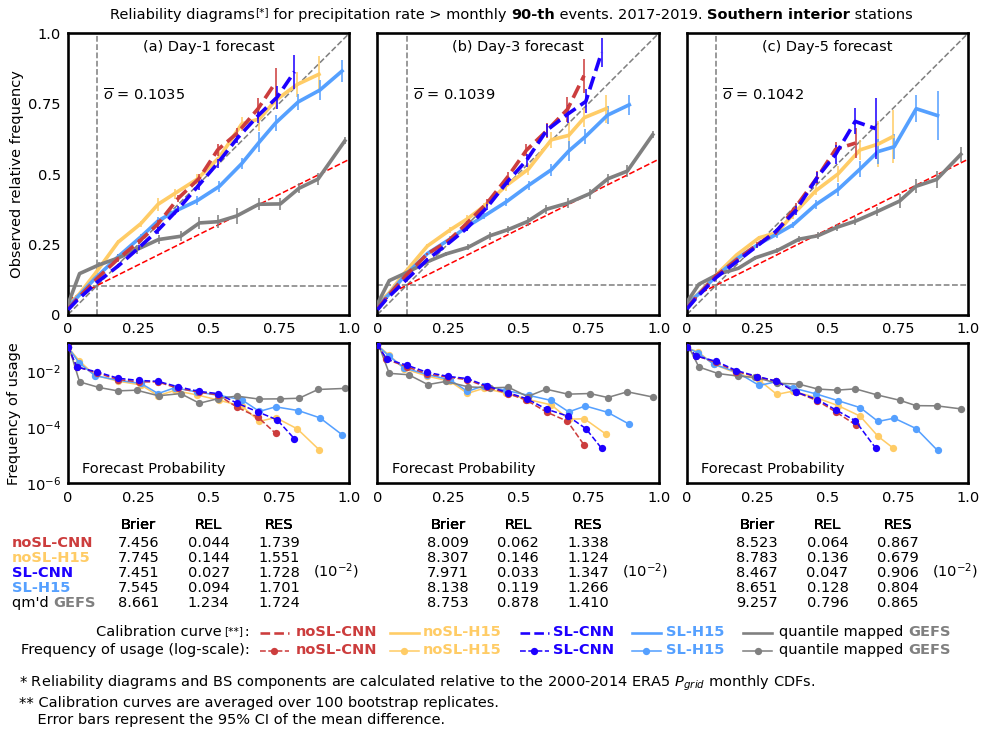

In [13]:
fig = plt.figure(figsize=(12, 12/(3.2)*2.05), dpi=dpi_)
titles = ['(a) Day-1 forecast', '(b) Day-3 forecast', '(c) Day-5 forecast']

handle_title = []
handle_lines = []
handle_marker = []

gs = gridspec.GridSpec(5, 5, height_ratios=[1, 0.1, 0.5, 0.15, 0.3], width_ratios=[1, 0.1, 1, 0.1, 1])

YLIM = [1e-6, 1e-1]
YLAB = [1e-6, 1e-4, 1e-2]

# no skill line
fake_x = np.linspace(0, 1, 100)
fake_y = [0.5*fake_x + 0.5*o_bar[1], 0.5*fake_x + 0.5*o_bar[3], 0.5*fake_x + 0.5*o_bar[5]]

AX_re = [] # reliability curve axis
AX_hi = [] # freq of use axis
AX_da = [] # data axis

for j in [0, 2, 4]:
    AX_re.append(plt.subplot(gs[0, j]))
    AX_hi.append(plt.subplot(gs[2, j]))
    AX_da.append(plt.subplot(gs[4, j]))

plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

for i, ax in enumerate(AX_re):
    ax = gu.ax_decorate_box(ax)
    ax.plot(fake_x, fake_x, linewidth=1.5, linestyle='--', color='0.5')
    ax.plot(fake_x, fake_y[i], linewidth=1.5, linestyle='--', color='r')

    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_aspect('equal')

for i, ax in enumerate(AX_da):
    ax.set_axis_off()

for i, ax in enumerate(AX_hi):
    ax = gu.ax_decorate_box(ax)
    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_yscale('log')
    ax.set_ylim(YLIM)
    ax.set_yticks(YLAB)
    
    ax.text(0.05, 0.05, 'Forecast Probability', ha='left', va='bottom', fontsize=14, transform=ax.transAxes)
        
AX_re[0].set_ylabel('Observed relative frequency', fontsize=14)
AX_hi[0].set_ylabel('Frequency of usage', fontsize=14)
AX_re[0].tick_params(axis="both", which="both", labelleft=True)
AX_hi[0].tick_params(axis="both", which="both", labelleft=True)

methods = ['bcnn', 'base', 'scnn', 'sl', 'gefs']
Z = [5, 4, 5, 4, 4, 3]
labels = ['noSL-CNN', 'noSL-H15', 'SL-CNN', 'SL-H15', 'GEFS']
label_ = ['             ',
          '             ',
          '         ',
          '         ',
          '                                    ',]

for i, ind in enumerate([0, 2, 4]):
    
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    
    AX_re[i].axvline(x=o_bar[ind], ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
    AX_re[i].axhline(y=o_bar[ind], xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
    
    for m, method in enumerate(methods):
        
        temp_p = PLOT['{}_pm'.format(method)][ind, :]
        temp_f = PLOT['{}_fm'.format(method)][ind, :]
        temp_95th = PLOT['{}_fs'.format(method)][ind, :]
        
        temp_ux = temp_p
        temp_uy = USE['{}'.format(method)][ind, :]
        
        AX_re[i].errorbar(temp_p, temp_f, yerr=temp_95th, **KW[method], zorder=Z[m])
        
        handle_lines += AX_hi[i].plot(temp_ux, temp_uy, color=C[m], linestyle=LS[m], linewidth=1.5, 
                                      marker='o', ms=7, mew=0, mfc=C[m], zorder=Z[m]-2, label=label_[m])
        
AX_re[0].text(0.125, 0.75, '$\overline{o}$ = 0.1035', ha='left', va='bottom', fontsize=14)
AX_re[1].text(0.125, 0.75, '$\overline{o}$ = 0.1039', ha='left', va='bottom', fontsize=14)
AX_re[2].text(0.125, 0.75, '$\overline{o}$ = 0.1042', ha='left', va='bottom', fontsize=14)

ax_t1 = fig.add_axes([0.5*(3.2-2.9)/3.2, 1.0, (2.9/3.2), 0.045])
ax_t1.set_axis_off()
handle_title += gu.string_partial_format(fig, ax_t1, 0, 1.0, 'left', 'top', 
                                         ['Reliability diagrams    for precipitation rate > monthly ', '90-th', 
                                         ' events. 2017-2019. ', 'Southern interior', ' stations'], 
                                         ['k',]*5, [14,]*5, ['normal', 'bold', 'normal', 'bold', 'normal'])

ax_t1.text(0.194, 1.0, '[*]', ha='right', va='top', fontsize=10, transform=ax_t1.transAxes);

for handle in handle_title:
    handle.set_bbox(dict(facecolor='w', pad=0, edgecolor='none', zorder=2))
    
loc_y = [0.708, 0.53, 0.352, 0.173, 0.,]

table_heads = ['Brier', 'REL', 'RES']
locx_heads = [0.25, 0.5, 0.75]

for i, ind in enumerate([0, 2, 4]):
    
    AX_da[i].text(1.035, 0.5-0.035, r'($10^{-2}$)', ha='right', va='center', fontsize=14, transform=AX_da[i].transAxes)
    
    for m, method in enumerate(methods):
        for j in range(3):
            AX_da[i].text(locx_heads[j], 0.93, table_heads[j], ha='center', va='bottom', 
                             fontsize=14, transform=AX_da[i].transAxes)

        AX_da[i].text(locx_heads[0], loc_y[m], '{:.3f}'.format(1e2*BS['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        AX_da[i].text(locx_heads[1], loc_y[m], '{:.3f}'.format(1e2*REL['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        AX_da[i].text(locx_heads[2], loc_y[m], '{:.3f}'.format(1e2*RES['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        
for m, method in enumerate(methods[:-1]):
    AX_da[0].text(-0.2, loc_y[m], labels[m], ha='left', va='bottom', color=C[m], 
                  fontsize=14, fontweight='bold', transform=AX_da[0].transAxes)

gu.string_partial_format(fig, AX_da[0], -0.2, loc_y[-1], 'left', 'bottom', ["qm'd ", 'GEFS'], 
                         ['k', gray, 'k'], [14,]*3,  ['normal', 'bold', 'normal']);
    
handle_errbar = []
handle_errbar.append(mlines.Line2D([], [], label=label_[0], **kw_lines['bcnn']))
handle_errbar.append(mlines.Line2D([], [], label=label_[1], **kw_lines['base']))
handle_errbar.append(mlines.Line2D([], [], label=label_[2], **kw_lines['scnn']))
handle_errbar.append(mlines.Line2D([], [], label=label_[3], **kw_lines['sl']))
handle_errbar.append(mlines.Line2D([], [], label=label_[4], **kw_lines['gfs']))

ax_box = fig.add_axes([-0.055, -0.085, 1.05, 0.0625])
ax_box.set_axis_off()

ax_lw1 = inset_axes(ax_box, height='50%', width='25%', borderpad=0, loc=2)
ax_lw2 = inset_axes(ax_box, height='50%', width='25%', borderpad=0, loc=3)
ax_lg1 = inset_axes(ax_box, height='50%', width='75%', borderpad=0, loc=1)
ax_lg2 = inset_axes(ax_box, height='50%', width='75%', borderpad=0, loc=4)

ax_lw1.text(1, 0.5, 'Calibration curve     : ', ha='right', va='center', fontsize=14, transform=ax_lw1.transAxes);
ax_lw2.text(1, 0.5, 'Frequency of usage (log-scale): ', ha='right', va='center', fontsize=14, transform=ax_lw2.transAxes);

ax_lw1.text(0.95, 0.55, '[**]', ha='right', va='center', fontsize=10, transform=ax_lw1.transAxes);

LG = ax_lg1.legend(handles=handle_errbar, 
                   bbox_to_anchor=(1, 1.5), ncol=5, prop={'size':14}, fancybox=False);
LG.get_frame().set_facecolor('none')
LG.get_frame().set_linewidth(0)
LG.get_frame().set_alpha(1.0)

LG1 = ax_lg2.legend(handles=handle_lines[0:5], 
                    bbox_to_anchor=(1, 1.5), ncol=5, prop={'size':14}, fancybox=False);
LG1.get_frame().set_facecolor('none')
LG1.get_frame().set_linewidth(0)
LG1.get_frame().set_alpha(1.0)

ax_lg1.text(0.0575, 0.9, 'noSL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.2375, 0.9, 'noSL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.42, 0.9, 'SL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.58, 0.9, 'SL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg1.transAxes)
gu.string_partial_format(fig, ax_lg1, 0.74, 0.9, 'left', 'top', ['quantile mapped ', 'GEFS'], 
                         ['k', gray, 'k'], [14,]*3,  ['normal', 'bold', 'normal']);

ax_lg2.text(0.0575, 0.9, 'noSL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.2375, 0.9, 'noSL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.42, 0.9, 'SL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.58, 0.9, 'SL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg2.transAxes)
gu.string_partial_format(fig, ax_lg2, 0.74, 0.9, 'left', 'top', ['quantile mapped ', 'GEFS'], 
                         ['k', gray, 'k'], [14,]*3,  ['normal', 'bold', 'normal']);

ax_lw1.set_axis_off()
ax_lg1.set_axis_off()
ax_lw2.set_axis_off()
ax_lg2.set_axis_off()

ax_w1 = fig.add_axes([-0.055, -0.135, 1.065, 0.025])
ax_w1.set_axis_off()
ax_w1.text(0, 1, '* Reliability diagrams and BS components are calculated relative to the 2000-2014 ERA5 $P_{grid}$ monthly CDFs.', 
          ha='left', va='top', fontsize=14, transform=ax_w1.transAxes);

ax_w2 = fig.add_axes([-0.055, -0.2, 1.065, 0.05])
ax_w2.set_axis_off()
ax_w2.text(0, 1, '** Calibration curves are averaged over 100 bootstrap replicates.\n    Error bars represent the 95% CI of the mean difference.', 
          ha='left', va='top', fontsize=14, transform=ax_w2.transAxes);

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'AnEn_BCH_Calib_southern.png', format='png', **fig_keys)

## Northeast BC

In [14]:
calib_dict = np.load(save_dir+'Calib_BCH_loc2.npy', allow_pickle=True)[()]
PLOT = calib_dict['PLOT']
BS = calib_dict['BS_3c']
USE = calib_dict['USE']
o_bar = calib_dict['o_bar']
REL = calib_dict['REL']
RES = calib_dict['RES']
#BS = calib_dict['BS_3c']

USE, PLOT = filter_single_point(USE, PLOT)
print('obar: {}, {}, {}'.format(o_bar[1], o_bar[3], o_bar[5]))

obar: 0.10296807449285002, 0.10302167838705321, 0.10346904235325878


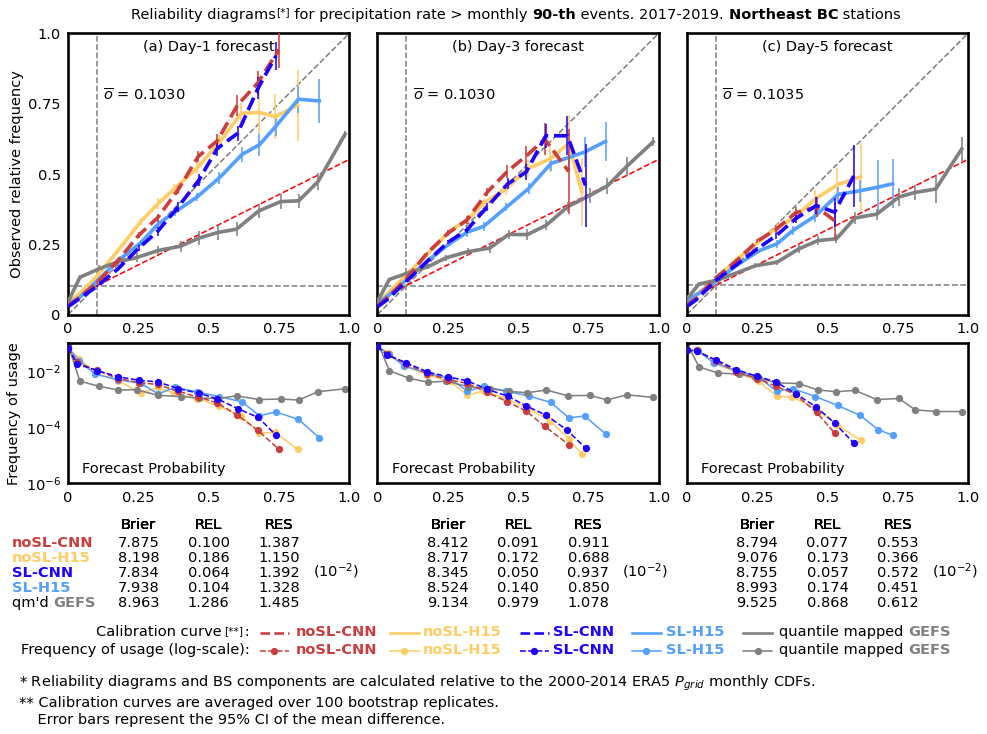

In [15]:
fig = plt.figure(figsize=(12, 12/(3.2)*2.05), dpi=dpi_)
titles = ['(a) Day-1 forecast', '(b) Day-3 forecast', '(c) Day-5 forecast']

handle_title = []
handle_lines = []
handle_marker = []

gs = gridspec.GridSpec(5, 5, height_ratios=[1, 0.1, 0.5, 0.15, 0.3], width_ratios=[1, 0.1, 1, 0.1, 1])

YLIM = [1e-6, 1e-1]
YLAB = [1e-6, 1e-4, 1e-2]

# no skill line
fake_x = np.linspace(0, 1, 100)
fake_y = [0.5*fake_x + 0.5*o_bar[1], 0.5*fake_x + 0.5*o_bar[3], 0.5*fake_x + 0.5*o_bar[5]]

AX_re = [] # reliability curve axis
AX_hi = [] # freq of use axis
AX_da = [] # data axis

for j in [0, 2, 4]:
    AX_re.append(plt.subplot(gs[0, j]))
    AX_hi.append(plt.subplot(gs[2, j]))
    AX_da.append(plt.subplot(gs[4, j]))

plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0)

for i, ax in enumerate(AX_re):
    ax = gu.ax_decorate_box(ax)
    ax.plot(fake_x, fake_x, linewidth=1.5, linestyle='--', color='0.5')
    ax.plot(fake_x, fake_y[i], linewidth=1.5, linestyle='--', color='r')

    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_ylim([0, 1])
    ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_yticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_aspect('equal')

for i, ax in enumerate(AX_da):
    ax.set_axis_off()

for i, ax in enumerate(AX_hi):
    ax = gu.ax_decorate_box(ax)
    ax.tick_params(axis="both", which="both", labelbottom=True)
    
    ax.set_xlim([0, 1])
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1.0])
    ax.set_xticklabels([0, 0.25, 0.5, 0.75, 1.0])
    
    ax.set_yscale('log')
    ax.set_ylim(YLIM)
    ax.set_yticks(YLAB)
    
    ax.text(0.05, 0.05, 'Forecast Probability', ha='left', va='bottom', fontsize=14, transform=ax.transAxes)
        
AX_re[0].set_ylabel('Observed relative frequency', fontsize=14)
AX_hi[0].set_ylabel('Frequency of usage', fontsize=14)
AX_re[0].tick_params(axis="both", which="both", labelleft=True)
AX_hi[0].tick_params(axis="both", which="both", labelleft=True)

methods = ['bcnn', 'base', 'scnn', 'sl', 'gefs']
Z = [5, 4, 5, 4, 4, 3]
labels = ['noSL-CNN', 'noSL-H15', 'SL-CNN', 'SL-H15', 'GEFS']
label_ = ['             ',
          '             ',
          '         ',
          '         ',
          '                                    ',]

for i, ind in enumerate([0, 2, 4]):
    
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    handle_title.append(AX_re[i].text(0.5, 0.975, titles[i], fontsize=14, 
                                         ha='center', va='top', transform=AX_re[i].transAxes))
    
    AX_re[i].axvline(x=o_bar[ind], ymin=0, ymax=1, linewidth=1.5, linestyle='--', color='0.5')
    AX_re[i].axhline(y=o_bar[ind], xmin=0, xmax=1, linewidth=1.5, linestyle='--', color='0.5')
    
    for m, method in enumerate(methods):
        
        temp_p = PLOT['{}_pm'.format(method)][ind, :]
        temp_f = PLOT['{}_fm'.format(method)][ind, :]
        temp_95th = PLOT['{}_fs'.format(method)][ind, :]
        
        temp_ux = temp_p
        temp_uy = USE['{}'.format(method)][ind, :]
        
        AX_re[i].errorbar(temp_p, temp_f, yerr=temp_95th, **KW[method], zorder=Z[m])
        
        handle_lines += AX_hi[i].plot(temp_ux, temp_uy, color=C[m], linestyle=LS[m], linewidth=1.5, 
                                      marker='o', ms=7, mew=0, mfc=C[m], zorder=Z[m]-2, label=label_[m])
        
AX_re[0].text(0.125, 0.75, '$\overline{o}$ = 0.1030', ha='left', va='bottom', fontsize=14)
AX_re[1].text(0.125, 0.75, '$\overline{o}$ = 0.1030', ha='left', va='bottom', fontsize=14)
AX_re[2].text(0.125, 0.75, '$\overline{o}$ = 0.1035', ha='left', va='bottom', fontsize=14)

ax_t1 = fig.add_axes([0.5*(3.2-2.75)/3.2, 1.0, (2.75/3.2), 0.045])
ax_t1.set_axis_off()
handle_title += gu.string_partial_format(fig, ax_t1, 0, 1.0, 'left', 'top', 
                                         ['Reliability diagrams    for precipitation rate > monthly ', '90-th', 
                                         ' events. 2017-2019. ', 'Northeast BC', ' stations'], 
                                         ['k',]*5, [14,]*5, ['normal', 'bold', 'normal', 'bold', 'normal'])

ax_t1.text(0.205, 1.0, '[*]', ha='right', va='top', fontsize=10, transform=ax_t1.transAxes);

for handle in handle_title:
    handle.set_bbox(dict(facecolor='w', pad=0, edgecolor='none', zorder=2))
    
loc_y = [0.708, 0.53, 0.352, 0.173, 0.,]

table_heads = ['Brier', 'REL', 'RES']
locx_heads = [0.25, 0.5, 0.75]

for i, ind in enumerate([0, 2, 4]):
    
    AX_da[i].text(1.035, 0.5-0.035, r'($10^{-2}$)', ha='right', va='center', fontsize=14, transform=AX_da[i].transAxes)
    
    for m, method in enumerate(methods):
        for j in range(3):
            AX_da[i].text(locx_heads[j], 0.93, table_heads[j], ha='center', va='bottom', 
                             fontsize=14, transform=AX_da[i].transAxes)

        AX_da[i].text(locx_heads[0], loc_y[m], '{:.3f}'.format(1e2*BS['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        AX_da[i].text(locx_heads[1], loc_y[m], '{:.3f}'.format(1e2*REL['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        AX_da[i].text(locx_heads[2], loc_y[m], '{:.3f}'.format(1e2*RES['{}'.format(method)][ind]), 
                      ha='center', va='bottom', color='k', fontsize=14, transform=AX_da[i].transAxes)
        
for m, method in enumerate(methods[:-1]):
    AX_da[0].text(-0.2, loc_y[m], labels[m], ha='left', va='bottom', color=C[m], 
                  fontsize=14, fontweight='bold', transform=AX_da[0].transAxes)

gu.string_partial_format(fig, AX_da[0], -0.2, loc_y[-1], 'left', 'bottom', ["qm'd ", 'GEFS'], 
                         ['k', gray, 'k'], [14,]*3,  ['normal', 'bold', 'normal']);
    
handle_errbar = []
handle_errbar.append(mlines.Line2D([], [], label=label_[0], **kw_lines['bcnn']))
handle_errbar.append(mlines.Line2D([], [], label=label_[1], **kw_lines['base']))
handle_errbar.append(mlines.Line2D([], [], label=label_[2], **kw_lines['scnn']))
handle_errbar.append(mlines.Line2D([], [], label=label_[3], **kw_lines['sl']))
handle_errbar.append(mlines.Line2D([], [], label=label_[4], **kw_lines['gfs']))
    
ax_box = fig.add_axes([-0.055, -0.085, 1.05, 0.0625])
ax_box.set_axis_off()

ax_lw1 = inset_axes(ax_box, height='50%', width='25%', borderpad=0, loc=2)
ax_lw2 = inset_axes(ax_box, height='50%', width='25%', borderpad=0, loc=3)
ax_lg1 = inset_axes(ax_box, height='50%', width='75%', borderpad=0, loc=1)
ax_lg2 = inset_axes(ax_box, height='50%', width='75%', borderpad=0, loc=4)

ax_lw1.text(1, 0.5, 'Calibration curve     : ', ha='right', va='center', fontsize=14, transform=ax_lw1.transAxes);
ax_lw2.text(1, 0.5, 'Frequency of usage (log-scale): ', ha='right', va='center', fontsize=14, transform=ax_lw2.transAxes);

ax_lw1.text(0.95, 0.55, '[**]', ha='right', va='center', fontsize=10, transform=ax_lw1.transAxes);

LG = ax_lg1.legend(handles=handle_errbar, 
                   bbox_to_anchor=(1, 1.5), ncol=5, prop={'size':14}, fancybox=False);
LG.get_frame().set_facecolor('none')
LG.get_frame().set_linewidth(0)
LG.get_frame().set_alpha(1.0)

LG1 = ax_lg2.legend(handles=handle_lines[0:5], 
                    bbox_to_anchor=(1, 1.5), ncol=5, prop={'size':14}, fancybox=False);
LG1.get_frame().set_facecolor('none')
LG1.get_frame().set_linewidth(0)
LG1.get_frame().set_alpha(1.0)

ax_lg1.text(0.0575, 0.9, 'noSL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.2375, 0.9, 'noSL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.42, 0.9, 'SL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg1.transAxes)
ax_lg1.text(0.58, 0.9, 'SL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg1.transAxes)
gu.string_partial_format(fig, ax_lg1, 0.74, 0.9, 'left', 'top', ['quantile mapped ', 'GEFS'], 
                         ['k', gray, 'k'], [14,]*3,  ['normal', 'bold', 'normal']);

ax_lg2.text(0.0575, 0.9, 'noSL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['bcnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.2375, 0.9, 'noSL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['base']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.42, 0.9, 'SL-CNN', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['scnn']['color'], transform=ax_lg2.transAxes)
ax_lg2.text(0.58, 0.9, 'SL-H15', ha='left', va='top', fontsize=14, fontweight='bold', 
            color=KW['sl']['color'], transform=ax_lg2.transAxes)
gu.string_partial_format(fig, ax_lg2, 0.74, 0.9, 'left', 'top', ['quantile mapped ', 'GEFS'], 
                         ['k', gray, 'k'], [14,]*3,  ['normal', 'bold', 'normal']);

ax_lw1.set_axis_off()
ax_lg1.set_axis_off()
ax_lw2.set_axis_off()
ax_lg2.set_axis_off()

ax_w1 = fig.add_axes([-0.055, -0.135, 1.065, 0.025])
ax_w1.set_axis_off()
ax_w1.text(0, 1, '* Reliability diagrams and BS components are calculated relative to the 2000-2014 ERA5 $P_{grid}$ monthly CDFs.', 
          ha='left', va='top', fontsize=14, transform=ax_w1.transAxes);

ax_w2 = fig.add_axes([-0.055, -0.2, 1.065, 0.05])
ax_w2.set_axis_off()
ax_w2.text(0, 1, '** Calibration curves are averaged over 100 bootstrap replicates.\n    Error bars represent the 95% CI of the mean difference.', 
          ha='left', va='top', fontsize=14, transform=ax_w2.transAxes);

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'AnEn_BCH_Calib_Northeast.png', format='png', **fig_keys)